## Problem Statement
For each month end date, create a portfolio of stocks by following rules:
1.  Select most liquid 250 names based on past 6 months. (Liquidity is given by price multiplied volume)
2. From 250 names select the stocks which have seen minimum of maximum 1-year drawdown. Drawdown is defined as peak-to-trough decline during a specific period (here last 1-year). So for each stock there will be maximum and minimum price point in last 1 year. The ratio of minimum price to maximum price will give maximum drawdown for that stocks. From the universe of 250 stocks selected on liquidity, select top 100 which have seen minimum of maximum drawdown.

3. From the selected 100 names, select 20 stocks with maximum return in last 1 month to get the required portfolio, which changes every month
4. Create NAV series from the selected portfolio assuming equal amount in each stocks. So at 1st portfolio assume 100 crores distributed in 20 stocks: - 5 crores in each. Based on returns of stocks in portfolio, 100 crores will maybe grow into 110 crores next month (or declined to 98 crores maybe). In the next month redistribute the 110 crores (or 98 crores depending on returns) equally into 2nd portfolio and then it grows into maybe 121 crores, redistribute that equally into 3rd portfolio and so on. The series of 100, 110, 121 etc. is the net asset value or NAV series.
5. From Market Cap file we have market capitalisation on each date as well. For each date sort stocks on highest to lowest market cap. Large Cap stocks are stocks which are in largest 100 stocks by market cap, Mid Cap are those which are in 100-250 and Small Cap are those having market capitalisation below market cap of top 250 stocks. Let’s say out of 20 stocks in selected portfolio 8 names are in top 100, 7 in 100 to 250 and 5 below 250. So 40% of portfolio is in Large cap, 35% in Mid cap and 25% in Small Cap.

In [103]:
# Importing Libraries

import pandas as pd
import numpy as np

# Importing Datasets

In [104]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [105]:
price = pd.read_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/Price Data.csv')
volume = pd.read_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/Volume Data.csv')
market_cap = pd.read_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/Market Cap Data.csv')

In [106]:
price.shape,volume.shape,market_cap.shape

((272, 1229), (272, 1229), (272, 1229))

In [107]:
volume1= volume.drop(["Dates"], axis=1)
liquidity = price.loc[:, price.columns != 'Dates']* volume1.values  # calculating liquidity
liquidity = liquidity.set_index(volume['Dates'])

# Finding Top 250 Liquidity Stocks

### Rank - Function

In [108]:
# Finding Ranks in Descending Order from High to Low
def rank(n,df):
  nlargest = n
  order = np.argsort(-df.values, axis=1)[:, :nlargest]
  ranks = pd.DataFrame(df.columns[order], 
                      columns=['Top{}'.format(i) for i in range(1, nlargest+1)],
                      index=liquidity.index)
  return ranks

In [109]:
# Finding Average Liquidity based on past 6 months
for i in liquidity.columns:
  liquidity[i] = liquidity[i].rolling(6).mean() 

  #https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

In [110]:
New_Ranks= rank(250,liquidity)  # for ranks after rolling
New_Ranks = New_Ranks.set_index(volume['Dates']) # Setting Index
New_Ranks.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/Col_drop/New_Ranks_250_Final.csv')
liquidity.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/Col_drop/liquidity_new_after_rolling_Final.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


### Function for fetching values

In [111]:
# Function to fetch values from different dataset

def fetch_values(from_df,to_df,to_save_in):
  ranks = to_save_in
  for i_rr,row_rr in to_df.iterrows():
    for col_rr in to_df.columns:
      y_rr = to_df.loc[i_rr,col_rr]
      j_rr = from_df.loc[i_rr,y_rr]
      ranks.loc[i_rr,col_rr] = j_rr
  return ranks


In [112]:
# retrieving top_250 liquidity values based on ranks
# Creating a dummy dataframe to store the liquidity values of top 250 stocks on each month end date
New_Ranks_dummy = pd.DataFrame(np.nan, index= New_Ranks.index, columns = New_Ranks.columns)
top_250_liquidity_values = fetch_values(liquidity,New_Ranks,New_Ranks_dummy)
top_250_liquidity_values.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/Col_drop/top_250_liquidity_values_Final.csv')

# Finding Lowest 100 Stocks having min maximum of 1 - year drawdown 

In [113]:
max_drawdown = pd.DataFrame()
price1=price.drop(["Dates"], axis=1)

In [114]:
# Finding max_drawdown based on ratio of min to max (10)
for i in price1.columns:
  max_drawdown[i] = price1[i].rolling(12).min()/price1[i].rolling(12).max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
max_drawdown = max_drawdown.set_index(New_Ranks.index)

In [116]:
top_250_max_drawdown_values = pd.DataFrame(np.nan, index = New_Ranks.index, columns = New_Ranks.columns)

In [117]:
fetch_values(max_drawdown,New_Ranks,top_250_max_drawdown_values)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top241,Top242,Top243,Top244,Top245,Top246,Top247,Top248,Top249,Top250
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,0.729434,0.724496,0.833630,0.868117,0.427325,0.783807,0.784314,0.554901,0.732760,0.832515,...,0.469800,0.596818,0.719886,0.788374,0.318204,0.656511,0.689899,0.603234,0.581325,0.676770
2022-05-31,0.729434,0.796875,0.478035,0.784314,0.833630,0.868117,0.296520,0.783807,0.644000,0.554901,...,0.460967,0.800173,0.812618,0.539175,0.605951,0.788766,0.599744,0.668410,0.522511,0.691916
2022-06-30,0.729434,0.774775,0.478035,0.850941,0.854994,0.809665,0.296520,0.772916,0.554901,0.590231,...,0.781883,0.463012,0.650732,0.590198,0.572750,0.800173,0.155802,0.639038,0.656734,0.687431


In [118]:
max_drawdown.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/max_drawdown_Final.csv')
top_250_max_drawdown_values.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/top_250_max_draw_values_Final.csv')

In [119]:
#finding Lowest 100 max_drawdon stocks in ascending order
nlargest = 100
order = np.argsort(top_250_max_drawdown_values.values, axis=1)[:, :nlargest]
min_100_ranks = pd.DataFrame(top_250_max_drawdown_values.columns[order], 
                      columns=['Low{}'.format(i) for i in range(1, nlargest+1)],
                      index=top_250_max_drawdown_values.index)
min_100_ranks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


,Low1,Low2,Low3,Low4,Low5,Low6,Low7,Low8,Low9,Low10,...,Low91,Low92,Low93,Low94,Low95,Low96,Low97,Low98,Low99,Low100
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-31,Top1,Top159,Top160,Top161,Top162,Top163,Top164,Top165,Top166,Top167,...,Top221,Top220,Top219,Top218,Top190,Top191,Top192,Top193,Top194,Top195
2000-02-29,Top1,Top159,Top160,Top161,Top162,Top163,Top164,Top165,Top166,Top167,...,Top221,Top220,Top219,Top218,Top190,Top191,Top192,Top193,Top194,Top195
2000-03-31,Top1,Top159,Top160,Top161,Top162,Top163,Top164,Top165,Top166,Top167,...,Top221,Top220,Top219,Top218,Top190,Top191,Top192,Top193,Top194,Top195
2000-04-28,Top1,Top159,Top160,Top161,Top162,Top163,Top164,Top165,Top166,Top167,...,Top221,Top220,Top219,Top218,Top190,Top191,Top192,Top193,Top194,Top195
2000-05-31,Top1,Top159,Top160,Top161,Top162,Top163,Top164,Top165,Top166,Top167,...,Top221,Top220,Top219,Top218,Top190,Top191,Top192,Top193,Top194,Top195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,Top181,Top160,Top210,Top151,Top130,Top80,Top86,Top245,Top153,Top15,...,Top229,Top118,Top191,Top124,Top41,Top226,Top165,Top133,Top122,Top12
2022-05-31,Top211,Top193,Top227,Top182,Top7,Top21,Top84,Top237,Top138,Top192,...,Top210,Top34,Top87,Top234,Top206,Top236,Top168,Top120,Top126,Top9
2022-06-30,Top247,Top188,Top215,Top7,Top20,Top195,Top103,Top183,Top88,Top160,...,Top34,Top112,Top118,Top220,Top111,Top128,Top204,Top240,Top14,Top206


In [120]:
min_100_names_ranks = pd.DataFrame(np.nan, index= min_100_ranks.index, columns = min_100_ranks.columns)
fetch_values(New_Ranks,min_100_ranks,min_100_names_ranks)
min_100_values = pd.DataFrame(np.nan, index= min_100_ranks.index, columns = min_100_ranks.columns)  # dummy  for storing variable
fetch_values(max_drawdown,min_100_names_ranks,min_100_values)

,Low1,Low2,Low3,Low4,Low5,Low6,Low7,Low8,Low9,Low10,...,Low91,Low92,Low93,Low94,Low95,Low96,Low97,Low98,Low99,Low100
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,0.037319,0.075600,0.241199,0.259450,0.297330,0.306057,0.312610,0.318204,0.320290,0.329945,...,0.625705,0.625715,0.627927,0.630664,0.634732,0.638799,0.640753,0.642741,0.642768,0.644000
2022-05-31,0.098775,0.171311,0.217731,0.266081,0.296520,0.306057,0.312610,0.316993,0.320290,0.341487,...,0.634951,0.636041,0.638180,0.638466,0.638799,0.639176,0.640753,0.642741,0.642768,0.644000
2022-06-30,0.155802,0.171311,0.201263,0.296520,0.306057,0.319979,0.320290,0.341487,0.343983,0.363663,...,0.613639,0.619894,0.620503,0.622486,0.625715,0.626234,0.627798,0.628899,0.630160,0.630296


In [121]:
min_100_names_ranks.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/min_100_rank_names_after_drawdown_Final.csv')
min_100_values.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/min_100_values_after_drawdown_final.csv')

# Top 20 Stocks having Higher returns

In [122]:
high_returns = pd.DataFrame(np.nan, index = min_100_names_ranks.index, columns = min_100_names_ranks.columns)  # Monthly returns for all 100 stocks

In [123]:
price2 = price.drop('Dates',axis=1)

In [124]:
# calculating Monthly returns in % change
monthly_returns =(price2.pct_change(periods=1))*100
monthly_returns = monthly_returns.set_index(min_100_ranks.index)

In [125]:
fetch_values(monthly_returns,min_100_names_ranks,high_returns)

,Low1,Low2,Low3,Low4,Low5,Low6,Low7,Low8,Low9,Low10,...,Low91,Low92,Low93,Low94,Low95,Low96,Low97,Low98,Low99,Low100
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,-28.248588,NaN,-18.175802,NaN,52.728298,NaN,NaN,NaN,48.641975,4.041008,...,-8.148088,60.000000,NaN,-11.102662,NaN,NaN,NaN,NaN,NaN,38.461538
2000-03-31,3.937008,NaN,32.132353,NaN,-19.428656,NaN,NaN,NaN,-3.227337,4.068813,...,-21.941454,-48.750000,NaN,-19.846022,NaN,NaN,NaN,NaN,NaN,0.000000
2000-04-28,0.000000,NaN,8.080134,NaN,-13.797526,NaN,NaN,NaN,-1.348700,-49.666627,...,6.565599,-16.260163,NaN,-14.140875,NaN,NaN,NaN,NaN,NaN,0.000000
2000-05-31,12.878788,NaN,-2.934816,NaN,5.930492,NaN,NaN,NaN,-20.830226,-39.622198,...,-13.391807,-19.417476,NaN,9.011809,NaN,NaN,NaN,NaN,NaN,144.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,-14.805726,-16.196761,-10.986367,-2.251656,-7.608171,50.561446,-4.708178,-1.137769,17.792370,51.458671,...,-1.264100,-5.559628,2.171429,-5.909242,1.351861,-3.039562,2.267574,5.532373,2.825693,-15.250213
2022-05-31,-23.571771,-10.236220,-9.729730,-8.536585,15.302301,-34.475163,-15.974568,11.008256,-26.330884,-17.015419,...,-6.460399,-10.664785,-5.018995,-1.663309,-13.889912,-12.074084,-8.980044,-0.844044,-8.006992,-12.451386
2022-06-30,-28.443114,-3.429027,-51.162060,-18.685228,2.151989,11.502364,20.372263,-12.793630,-19.703390,-18.895542,...,-15.449406,14.309959,-10.931923,-11.858084,-5.897793,-12.625530,8.312265,-4.358714,-13.428514,5.472080


In [126]:
ttop_20_ranks= rank(20,high_returns) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [127]:
ttop_20_ranks

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20
Dates,,,,,,,,,,,,,,,,,,,,
2000-01-31,Low1,Low73,Low72,Low71,Low70,Low69,Low68,Low67,Low66,Low65,Low64,Low63,Low62,Low61,Low60,Low59,Low58,Low57,Low56,Low55
2000-02-29,Low74,Low67,Low92,Low5,Low50,Low9,Low100,Low17,Low45,Low89,Low69,Low36,Low14,Low57,Low20,Low48,Low61,Low24,Low10,Low43
2000-03-31,Low3,Low45,Low21,Low18,Low61,Low89,Low86,Low14,Low25,Low66,Low10,Low1,Low44,Low63,Low41,Low100,Low87,Low76,Low17,Low9
2000-04-28,Low67,Low25,Low44,Low50,Low76,Low3,Low48,Low21,Low91,Low23,Low71,Low20,Low68,Low63,Low41,Low1,Low100,Low77,Low83,Low9
2000-05-31,Low53,Low100,Low36,Low15,Low86,Low21,Low18,Low1,Low50,Low94,Low14,Low5,Low69,Low64,Low25,Low63,Low41,Low87,Low44,Low23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,Low52,Low10,Low6,Low14,Low30,Low13,Low41,Low9,Low67,Low65,Low86,Low77,Low54,Low11,Low43,Low76,Low26,Low15,Low18,Low32
2022-05-31,Low17,Low5,Low50,Low8,Low35,Low67,Low30,Low53,Low87,Low23,Low73,Low55,Low47,Low41,Low58,Low14,Low76,Low42,Low11,Low66
2022-06-30,Low7,Low81,Low92,Low23,Low6,Low97,Low27,Low100,Low37,Low55,Low5,Low89,Low68,Low66,Low11,Low73,Low26,Low50,Low69,Low31


In [128]:
Top_20_rank_names = pd.DataFrame(np.nan, index= ttop_20_ranks.index, columns = ttop_20_ranks.columns)
fetch_values(min_100_names_ranks,ttop_20_ranks,Top_20_rank_names)
Top_20_rank_values= pd.DataFrame(np.nan, index= ttop_20_ranks.index, columns = ttop_20_ranks.columns)  # dummy  for storing variable
fetch_values(monthly_returns,Top_20_rank_names,Top_20_rank_values)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20
Dates,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,161.561562,83.253589,60.000000,52.728298,50.372846,48.641975,38.461538,37.546773,26.666667,25.704394,21.172638,18.545455,17.679558,16.969050,15.902778,12.371233,11.717496,5.911330,4.041008,3.410183
2000-03-31,32.132353,26.698565,21.882378,20.279720,15.325670,14.155251,11.909744,9.389671,6.213873,6.019231,4.068813,3.937008,0.987890,0.000000,0.000000,0.000000,-1.050263,-1.793070,-2.796906,-3.227337
2000-04-28,44.383562,12.653061,11.549385,11.506819,8.117444,8.080134,7.790844,7.184996,6.565599,3.896104,3.761062,0.252313,0.000000,0.000000,0.000000,0.000000,0.000000,-0.538885,-0.802139,-1.348700
2000-05-31,155.555556,144.444444,28.228228,22.918919,20.622087,17.308798,17.303609,12.878788,9.423125,9.011809,8.888889,5.930492,3.610108,2.968750,2.053140,0.000000,0.000000,-0.088652,-0.905233,-1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,77.283654,51.458671,50.561446,42.156585,36.209379,27.371941,19.042140,17.792370,17.784600,15.746640,15.112545,14.830441,14.318955,14.008188,13.697581,13.165426,12.728411,12.722138,10.869737,9.289617
2022-05-31,18.164362,15.302301,15.246724,11.008256,10.033898,8.520012,8.199046,7.454233,7.321280,4.738138,4.376938,2.410537,1.943307,1.894248,1.359689,1.052632,0.929615,0.829539,0.714337,0.458899
2022-06-30,20.372263,17.254080,14.309959,11.645102,11.502364,8.312265,7.338480,5.472080,3.941079,2.955420,2.151989,1.077249,0.983118,0.093342,-0.208119,-0.439016,-1.066098,-1.237841,-1.455293,-2.015679


In [129]:
Top_20_rank_values.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/top_20_ranks_values_Final.csv')
Top_20_rank_names.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/top_20_ranks_names_Final.csv')
monthly_returns.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/monthly_returns_values_Final.csv')

# Creating NAV Series

In [130]:
returns = Top_20_rank_values/100  # conevrted for calculations of NAV amount
final_amount = pd.DataFrame(columns=returns.columns, index =returns.index ) # for calculating final amount
NAV_value = [] # blank list
initial_amount = 10**9  # initial 100 Crs into stocks
for i, j in returns.iterrows():
  individual = initial_amount / 20
  final_amount.loc[i]= individual * returns.loc[i]
  row_sum = final_amount.loc[i].sum(axis=0)
  NAV_value.append(row_sum)
  initial_amount == row_sum

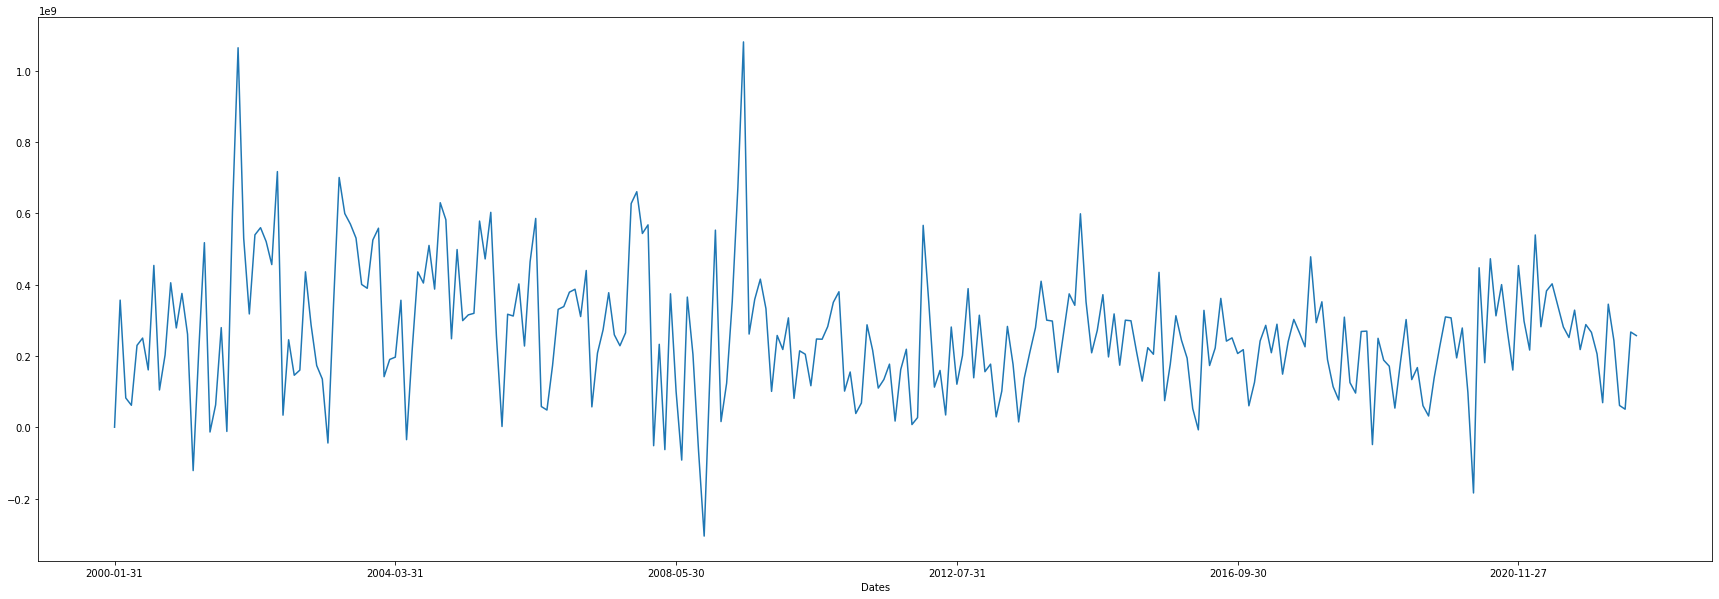

In [131]:
# Plotting NAV Values
NAV_data = pd.DataFrame(NAV_value,columns=['Month_End_Sum'], index =returns.index)  # 
import matplotlib.pyplot as plt
%matplotlib inline

# Plot adjusted close price data
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
NAV_data['Month_End_Sum'].plot()
plt.show()

In [132]:
NAV_data.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/monthly_NAV_values_Final.csv')
final_amount.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/Stockwise_NAV_returns_values_Final.csv')

In [133]:
market_cap_new = market_cap
market_cap_new_new = market_cap_new.drop('Dates', axis=1)  # dropping dates for calculation
market_cap_new = market_cap_new.set_index(returns.index)

In [134]:
mc_ranks= rank(len(market_cap_new_new.columns),market_cap_new_new)  # ranked each stock from high to low market cap values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [135]:
mc_ranks.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/Sorted_ranks_MC_stock_names_final.csv')

In [136]:
market_cap_ranks_values = pd.DataFrame(index= mc_ranks.index)  # dummy for market cap values

In [137]:
fetch_values(market_cap_new,mc_ranks,market_cap_ranks_values)  # fetching values

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top1219,Top1220,Top1221,Top1222,Top1223,Top1224,Top1225,Top1226,Top1227,Top1228
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-31,9.108911e+05,5.354190e+05,4.765387e+05,3.072034e+05,3.005869e+05,2.261739e+05,1.963816e+05,1.767000e+05,1.731555e+05,1.711156e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,1.512423e+06,6.367501e+05,5.757222e+05,2.908161e+05,2.627919e+05,2.440897e+05,2.346374e+05,2.118595e+05,1.835704e+05,1.794870e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,1.258783e+06,5.887750e+05,5.357484e+05,2.936641e+05,2.304607e+05,1.934279e+05,1.908278e+05,1.803800e+05,1.748000e+05,1.480500e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-28,7.632351e+05,5.357340e+05,5.270205e+05,3.239175e+05,1.754626e+05,1.568527e+05,1.417815e+05,1.398865e+05,1.325712e+05,1.263500e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,5.644513e+05,4.623955e+05,4.246242e+05,3.621763e+05,2.007720e+05,1.816640e+05,1.776805e+05,1.723570e+05,1.429457e+05,1.221695e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,1.887692e+07,1.297756e+07,7.679697e+06,6.594407e+06,5.250984e+06,5.165887e+06,4.508740e+06,4.429285e+06,4.193143e+06,4.042498e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,1.781087e+07,1.231033e+07,7.710436e+06,6.326313e+06,5.529176e+06,5.234582e+06,4.184980e+06,4.177611e+06,3.975698e+06,3.682086e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,1.756082e+07,1.195449e+07,7.487537e+06,6.150863e+06,5.240998e+06,4.919085e+06,4.157977e+06,3.938942e+06,3.880392e+06,3.370410e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
market_cap_ranks_values.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/Sorted_ranks_MC_stock_values_Final.csv')

# Categorising Based on Cap Size

In [139]:
large_cap_stocks = mc_ranks.iloc[:,0:100]
mid_cap_stocks = mc_ranks.iloc[:,100:250]
small_cap_stocks = mc_ranks.iloc[:,250:]

In [140]:
large_cap_stocks.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/large_cap_stocks_names.csv')
mid_cap_stocks.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/mid_cap_stocks_names.csv')
small_cap_stocks.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/small_cap_stocks_names.csv')

In [141]:
top_20_ranks_names =Top_20_rank_names

In [142]:
monthwise_portfolio = pd.DataFrame(index = top_20_ranks_names.index, columns = ['Large_Cap', 'Mid_Cap','Small_Cap'])  # Created Portfolio variabble

In [143]:
# Calculating count of large_cap_stocks
for i_mc,row_mc in top_20_ranks_names.iterrows():
  count =0
  for col_mc in top_20_ranks_names.columns:
    y_mc = top_20_ranks_names.loc[i_mc,col_mc]
    for k_mc in large_cap_stocks.loc[i_mc]:
      if (y_mc == k_mc):
        count += 1
  monthwise_portfolio.loc[i_mc,'Large_Cap'] = count

In [144]:
# Calculating count of large_cap_stocks
for i_mc,row_mc in top_20_ranks_names.iterrows():
  count =0
  for col_mc in top_20_ranks_names.columns:
    y_mc = top_20_ranks_names.loc[i_mc,col_mc]
    for k_mc in mid_cap_stocks.loc[i_mc]:
      if (y_mc == k_mc):
        count += 1
  monthwise_portfolio.loc[i_mc,'Mid_Cap'] = count

In [145]:
# Calculating count of large_cap_stocks
for i_mc,row_mc in top_20_ranks_names.iterrows():
  count =0
  for col_mc in top_20_ranks_names.columns:
    y_mc = top_20_ranks_names.loc[i_mc,col_mc]
    for k_mc in small_cap_stocks.loc[i_mc]:
      if (y_mc == k_mc):
        count += 1
  monthwise_portfolio.loc[i_mc,'Small_Cap'] = count

In [146]:
monthwise_portfolio

,Large_Cap,Mid_Cap,Small_Cap
Dates,,,
2000-01-31,2,3,15
2000-02-29,4,4,12
2000-03-31,4,4,12
2000-04-28,5,6,9
2000-05-31,4,6,10
...,...,...,...
2022-04-29,7,6,7
2022-05-31,4,10,6
2022-06-30,5,11,4


In [147]:
monthwise_portfolio.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/monthwise_portfolios_stock_category_count_final.csv')

In [148]:
monthwise_portfolio_percentage =  monthwise_portfolio*5

In [149]:
monthwise_portfolio_percentage.to_csv('/content/drive/MyDrive/Kotak_Mahindra_Case_Study/Case Study 2/monthwise_portfolios_stock_category_percentages_Final.csv')